# Labib Kamran
# 467183
# BSCS 13-D

---
---

# Data Visualization, Lab 13

# Task A

### Chart 1

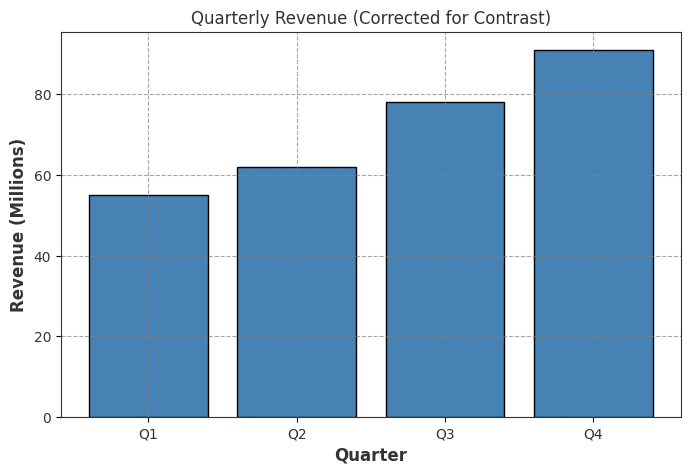

In [2]:
import matplotlib.pyplot as plt
import numpy as np

quarters = np.array(["Q1", "Q2", "Q3", "Q4"])
revenue_millions = np.array([55, 62, 78, 91])

contrast = '#222222'
bar_style = dict(color='#4c89c6', edgecolor='black')

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(quarters, revenue_millions, **bar_style)

ax.set_xlabel('Quarter', color=contrast, fontsize=12, fontweight='bold')
ax.set_ylabel('Revenue (Millions)', color=contrast, fontsize=12, fontweight='bold')
ax.set_title('Quarterly Revenue (Corrected for Contrast)', color=contrast)
ax.tick_params(colors=contrast)

for spine in ax.spines.values():
    spine.set_color(contrast)

ax.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.show()


### Chart 2

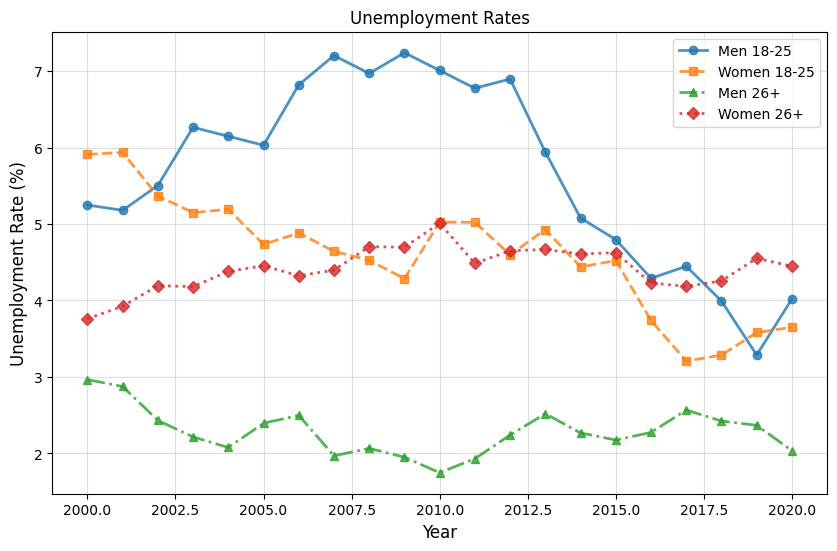

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

years = np.arange(2000, 2021)
rng = np.random.default_rng(42)
groups = ['Men 18-25', 'Women 18-25', 'Men 26+', 'Women 26+']
noise_and_offsets = [
    (0.5, 5),
    (0.4, 6),
    (0.3, 3),
    (0.2, 4)
]
series = [np.cumsum(rng.normal(0, sd, years.size)) + offset for sd, offset in noise_and_offsets]

fig, ax = plt.subplots(figsize=(10, 6))
marker_cycle = cycle(['o', 's', '^', 'D'])
style_cycle = cycle(['-', '--', '-.', ':'])

for label, y, mark, style in zip(groups, series, marker_cycle, style_cycle):
    ax.plot(years, y, label=label, linewidth=2, alpha=0.8, marker=mark, linestyle=style)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Unemployment Rate (%)', fontsize=12)
ax.legend(loc='upper right', frameon=True)
ax.grid(True, alpha=0.4)
ax.set_title('Unemployment Rates')
plt.show()


### Chart 3

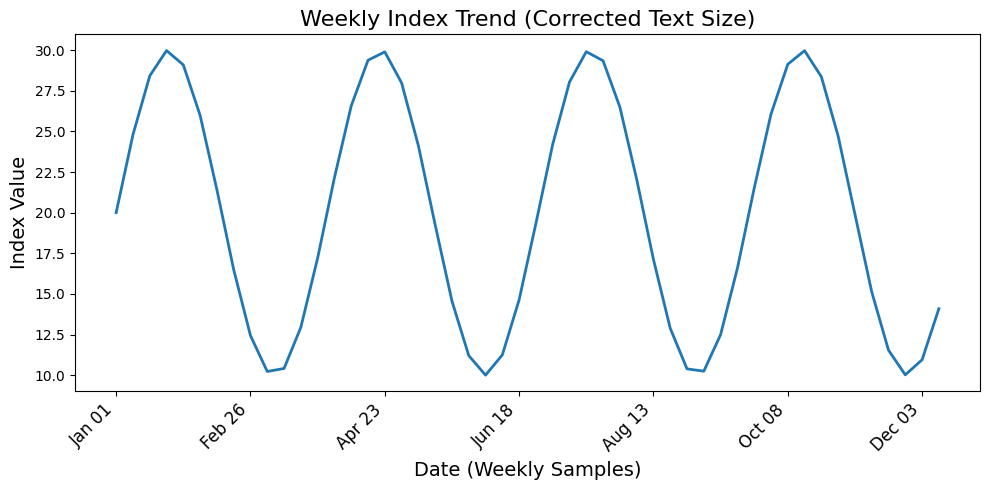

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

weeks = pd.date_range('2023-01-01', periods=50, freq='W')
trend = pd.Series(np.sin(np.arange(50) * 0.5) * 10 + 20, index=weeks)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(trend.index, trend.values, linewidth=2)

selected_ticks = trend.index[::8]
ax.set_xticks(selected_ticks)
ax.set_xticklabels([d.strftime('%b %d') for d in selected_ticks], rotation=45, ha='right', fontsize=12)

ax.set_xlabel('Date (Weekly Samples)', fontsize=14)
ax.set_ylabel('Index Value', fontsize=14)
ax.set_title('Weekly Index Trend (Corrected Text Size)', fontsize=16)
fig.tight_layout()
plt.show()


### Chart 4

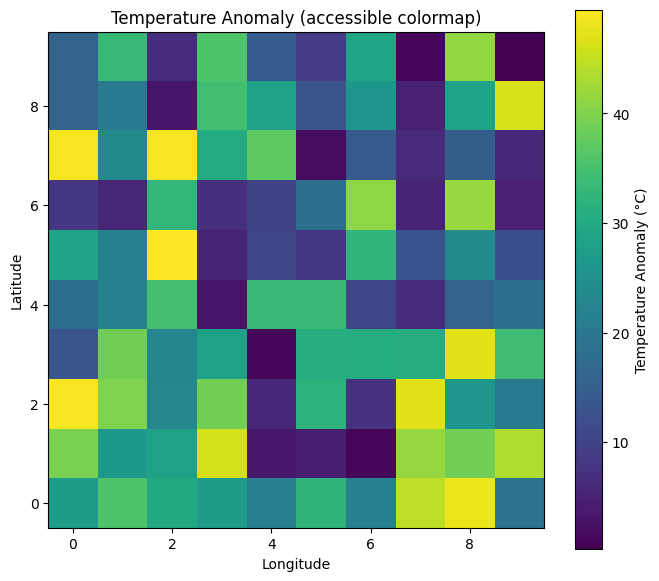


--- ACCESSIBILITY TEXT SUMMARY ---
Chart Type: Heatmap showing Temperature Anomalies across a 10x10 grid.
Data Summary:
 - Minimum Temperature: 0.23 °C
 - Maximum Temperature: 49.42 °C
 - Average Temperature: 23.64 °C


In [12]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng(seed=0)
grid = rng.random((10, 10)) * 50

fig, ax = plt.subplots(figsize=(8, 7))
img = ax.imshow(grid, cmap='viridis', origin='lower', interpolation='nearest')

fig.colorbar(img, ax=ax, label='Temperature Anomaly (°C)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Temperature Anomaly (accessible colormap)')
plt.show()

print("\n--- ACCESSIBILITY TEXT SUMMARY ---")
print("Chart Type: Heatmap showing Temperature Anomalies across a 10x10 grid.")
print("Data Summary:")
print(f" - Minimum Temperature: {grid.min():.2f} °C")
print(f" - Maximum Temperature: {grid.max():.2f} °C")
print(f" - Average Temperature: {grid.mean():.2f} °C")


# Task B - Dual axis Visualization

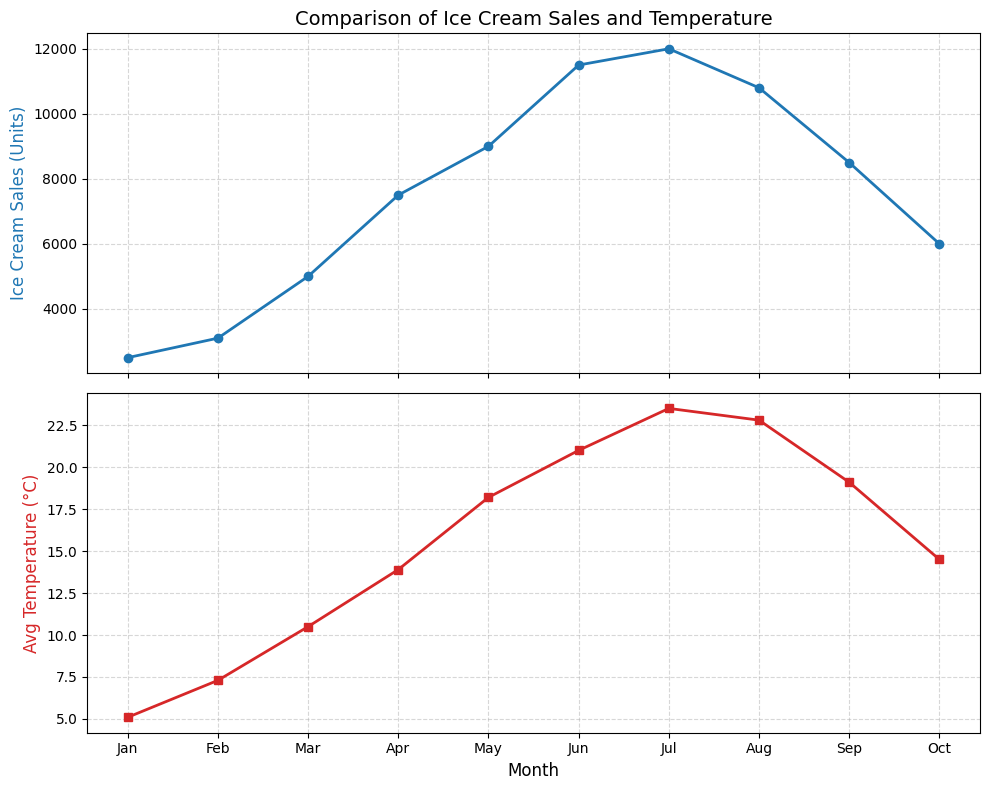

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'],
    'Avg_Temp_C': [5.1, 7.3, 10.5, 13.9, 18.2, 21.0, 23.5, 22.8, 19.1, 14.5],
    'Ice_Cream_Sales': [2500, 3100, 5000, 7500, 9000, 11500, 12000, 10800, 8500, 6000]
}

df = pd.DataFrame(data).set_index('Month')

fig, (ax_sales, ax_temp) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

df['Ice_Cream_Sales'].plot(ax=ax_sales, color='tab:blue', marker='o', linestyle='-', linewidth=2)
ax_sales.set_ylabel('Ice Cream Sales (Units)', fontsize=12, color='tab:blue')
ax_sales.set_title('Comparison of Ice Cream Sales and Temperature', fontsize=14)
ax_sales.grid(True, linestyle='--', alpha=0.5)

df['Avg_Temp_C'].plot(ax=ax_temp, color='tab:red', marker='s', linestyle='-', linewidth=2)
ax_temp.set_ylabel('Avg Temperature (°C)', fontsize=12, color='tab:red')
ax_temp.set_xlabel('Month', fontsize=12)
ax_temp.grid(True, linestyle='--', alpha=0.5)

fig.tight_layout()
plt.show()


# Task 3 - Truthful Representation

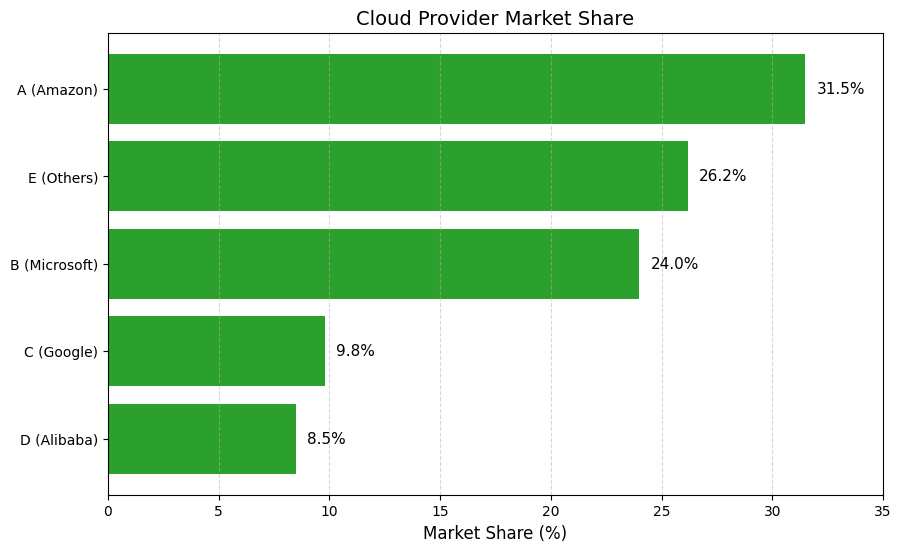

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Provider': ['A (Amazon)', 'B (Microsoft)', 'C (Google)', 'D (Alibaba)', 'E (Others)'],
    'Market_Share_Pct': [31.5, 24.0, 9.8, 8.5, 26.2]
}

df = pd.DataFrame(data)
ordered = df.sort_values('Market_Share_Pct', ascending=True)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(ordered['Provider'], ordered['Market_Share_Pct'], color='#2ca02c')

for bar, pct in zip(bars, ordered['Market_Share_Pct']):
    ax.text(pct + 0.5, bar.get_y() + bar.get_height() / 2, f'{pct}%', va='center', fontsize=11)

ax.set_xlabel('Market Share (%)', fontsize=12)
ax.set_title('Cloud Provider Market Share', fontsize=14)
ax.set_xlim(0, 35)
ax.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()
